In [1]:
csv_path="D:/Cryptography/Deeplearning/NLP/lesson2/export_sql_1558435/sqlResult_1558435.csv"

In [2]:
import pandas as pd

In [3]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [4]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
content = content.fillna('')

In [6]:
news_content = content['content'].tolist()

In [7]:
import jieba

In [8]:
def cut(string): return ' '.join(jieba.cut(string))

In [9]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Dumping model to file cache X:\Users\SHIYIN~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.931 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [10]:
import re

In [11]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [12]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [13]:
news_content = [token(n) for n in news_content]

In [14]:
news_content = [' '.join(n) for n in news_content]

In [15]:
news_content = [cut(n) for n in news_content]

In [16]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [17]:
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [18]:
document_frequency('关于')

3376

In [19]:
import math

In [20]:
def idf(word):
    return math.log10(len(news_content)/document_frequency(word))

In [21]:
idf('的')

0.1051466115514474

In [22]:
idf('小米')

2.948039950009831

In [23]:
def tf(word,document):
    words = document.split()
    return sum(1 for n in words if n==word)

In [24]:
news_content[11]

'巨丰 早评   市场 将 再次 探底   巨丰 观点   周四 大盘 冲高 回落   2500 余 只 个股 下跌   上证 50   沪 深 300 指数 顽强 收红   早盘 大盘 低开 高 走   展开 反弹   沪 指 冲破 120 日 均线 压力 位   午后 大盘 跳水   个股 普跌   盘面 上   保险   电力   银行   民航机场   券商   房地产   人工智能   迪士尼   网络安全 等 板块 涨幅 居前   雄安 新区   福州 新区   医疗器械   丝绸之路 等 跌幅 居前   金融股 全线 大涨   保险 板块 涨 3   新华 保险   中国 太保   中国 人寿 涨 4   中国 平安 涨 2   西水股份   天茂 集团 盘中 大涨 7   以上   银行 板块 涨 2   招商银行 大涨 8   贵阳 银行   兴业银行   浦发银行   兴业银行 等 涨幅 居前   金融股 是 A股 纳入 MSCI 指数 的 受益者   后市 可以 逢 低 关注   盘中 万达 电影   复星 医药 等 白马股 闪崩   导致 午后 市场 出现 大幅 跳水   盘后 消息   银监会 于 6 月 中旬 要求 各家 银行 排查 包括 万达   海航 集团   复星   浙江 罗森 内里 在内 数家 企业 的 授信 及 风险 分析   排查 对象 多 是 近年来 海外投资 比较 凶猛   在 银行业 敞口 较大 的 民营企业 集团   巨丰 投顾 认为 自 5 月 以来   大盘 已经 走出 了 3 重底 的 走势   并 开启 中级 反弹 行情   沪 指 在 上证 50 及 白马股 推动 下 率先 反弹   但 遭遇 60 日   120 日 均线 强 压力 而 出现 调整   MSCI 纳入 A股 后   沪 深 300 指数 创 17 个 月 新高   但 2500 余股 下跌   市场 分化 明显   随着 6 月末 市场 流动性 紧张 的 可能 出现   市场 将 再次出现 探底   建议 投资者 重点 关注 半年报 大幅 预增 的 错 杀 股 和 具备 估值 优势 的 大 蓝筹   天信 投资   尾盘 跳水 原因 揭秘   伏击 的 品种 曝光   周四 市场 点评   沪 深 两市 早盘 纷纷 低开   但是 开盘 

In [25]:
tf('银行',news_content[11])

6

In [26]:
def get_keywords_of_a_document(document):
    words = set(document.split())
    
    tfidf = [
        (w,tf(w,document)*idf(w)) for w in words
    ]
    tfidf = sorted(tfidf,key = lambda x: x[1], reverse=True)
    return tfidf

In [27]:
get_keywords_of_a_document(news_content[0])

[('MIUI', 13.953993984385477),
 ('机型', 5.854110917055407),
 ('体验版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('系统优化', 4.9523613237924735),
 ('稳定版', 4.9523613237924735),
 ('精力', 4.865066660033509),
 ('内测', 4.17421007340883),
 ('官方消息', 3.9523613237924735),
 ('距今已有', 3.6301420290585544),
 ('更新换代', 3.433847383914586),
 ('用到', 3.339577467072738),
 ('确切', 3.139447967149618),
 ('有余', 3.0128420711738553),
 ('小米', 2.948039950009831),
 ('猜测', 2.6828483795745575),
 ('本周', 2.3069390544433817),
 ('其余', 2.2953054709353697),
 ('工程师', 2.2595144045152438),
 ('更新', 2.2143739974590426),
 ('暂停', 2.188933330229536),
 ('发布', 2.15877938610806),
 ('之中', 2.129539678489369),
 ('当然', 2.040139267260058),
 ('等待', 2.0327603000083627),
 ('有人', 1.7504182603908234),
 ('研发', 1.7322532357524185),
 ('手机', 1.7180971994136842),
 ('确保', 1.6071837072497697),
 ('含', 1.5902560044987006),
 ('集中', 1.558260021752429),
 ('时候', 1.5056688574209465),
 ('版', 1.4878717763585023),
 ('开发', 1.428354878235101),
 ('关于', 1.4239588

In [29]:
get_keywords_of_a_document(news_content[11])

[('市场', 21.353584391728972),
 ('股指', 18.198034968575843),
 ('周四', 17.26088617439966),
 ('均线', 15.505514875366993),
 ('板块', 15.184208429020511),
 ('创业板', 15.040542723113257),
 ('沪', 14.096891190311872),
 ('反弹', 11.40131732928378),
 ('巨丰', 11.244724023409647),
 ('普涨', 11.1657372072426),
 ('居前', 10.78835527475667),
 ('午后', 10.712813898115176),
 ('早盘', 10.614032989531069),
 ('大盘', 10.528860150725679),
 ('保险', 9.712428450401568),
 ('跳水', 9.392541082832015),
 ('具备', 9.384071811999714),
 ('局部性', 8.950480138145622),
 ('走势', 8.886316192504337),
 ('回落', 8.85749598983617),
 ('银行', 8.730101656649362),
 ('大涨', 8.113164172292002),
 ('涨幅', 7.982850978349081),
 ('阴线', 7.904722647584947),
 ('普跌', 7.676835942971274),
 ('半年线', 7.552540129473584),
 ('上影线', 7.552540129473584),
 ('题材', 7.529644664184074),
 ('个股', 7.317431171173604),
 ('伏击', 7.0747759516433115),
 ('探底', 7.010406584900509),
 ('行情', 6.978062869252294),
 ('兴业银行', 6.560526931713512),
 ('沪市', 6.52433048752792),
 ('复星', 6.472715960315349),
 ('白马股'

In [30]:
news_keywords=get_keywords_of_a_document(news_content[101])

In [31]:
news_keywords_dict={w:score for w,score in news_keywords}

In [32]:
import wordcloud

In [33]:
wc = wordcloud.WordCloud('D:/Cryptography/Deeplearning/NLP/lesson6/SourceHanSerifSC-Regular.otf')

In [34]:
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline

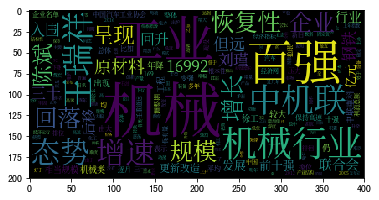

In [36]:
plt.imshow(wc.generate_from_frequencies(news_keywords_dict))

In [37]:
from PIL import Image

In [38]:
import numpy as np

In [39]:
cloud_mask = np.array(Image.open("D:/Cryptography/Deeplearning/NLP/lesson6/cloud.png"))

In [40]:
wordcloud_with_mask = wordcloud.WordCloud(
font_path = 'D:/Cryptography/Deeplearning/NLP/lesson6/SourceHanSerifSC-Regular.otf',
mask = cloud_mask
)

In [48]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies(news_keywords_dict[:20]))

TypeError: unhashable type: 'slice'

## TFIDF Vectorized

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [118]:
vectorized = TfidfVectorizer(max_features=10000)

In [119]:
news_content[:10]

['此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息',
 '骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台',
 '此前 的 一加 3T 搭载 的 是 3400mAh 电池   DashCharge 快充 规格 为 5V   4A   至于 电池 缩水   可能 与 刘作 虎 所说   一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关   按照 目前 掌握 的 资料   一加 手机 5 拥有 5   5 寸 1080P 三星 AMOLED 显示屏   6G   8GB   RAM   64GB   128GB   ROM   双 1600 万 摄像头   备货 量

In [120]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [121]:
X=vectorized.fit_transform(sub_samples)

In [122]:
X[0] #X[0]是什么？

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [126]:
X.shape

(50000, 10000)

<10000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 3541496 stored elements in Compressed Sparse Column format>

In [117]:
vectorized.vocabulary_

{'此外': 121842,
 '本周': 113316,
 '12': 748,
 '小米': 79768,
 '手机': 96222,
 '15': 1302,
 '机型': 113965,
 '其余': 40557,
 '暂停': 110749,
 '更新': 111171,
 '发布': 54934,
 '开发': 87253,
 '体验版': 33700,
 '内测': 41261,
 '稳定版': 147807,
 '暂不受': 110739,
 '影响': 90261,
 '确保': 145140,
 '工程师': 82526,
 '可以': 56421,
 '集中': 191104,
 '全部': 39078,
 '精力': 150980,
 '进行': 179245,
 '系统优化': 151305,
 '工作': 82344,
 '有人': 111993,
 '猜测': 135822,
 '主要': 24361,
 '用到': 139242,
 'miui': 11511,
 '研发': 144830,
 '之中': 24637,
 '去年': 53818,
 '距今已有': 175690,
 '一年': 15455,
 '有余': 112011,
 '时候': 108819,
 '更新换代': 111174,
 '当然': 89869,
 '关于': 40191,
 '确切': 145146,
 '信息': 35850,
 '我们': 95030,
 '还是': 178688,
 '等待': 149881,
 '官方消息': 76535,
 '骁龙': 196390,
 '835': 6313,
 '作为': 34294,
 '唯一': 62110,
 '通过': 180965,
 'windows': 14515,
 '10': 312,
 '桌面': 119462,
 '平台': 84889,
 '认证': 169373,
 'arm': 7437,
 '处理器': 68198,
 '高通': 197355,
 '强调': 89589,
 '不会': 19076,
 '因为': 63698,
 '考虑': 156835,
 '性能': 92723,
 '屏蔽掉': 81169,
 '核心': 118922,
 '相反': 143074,
 

In [68]:
np.where(X[0].toarray()) #得到不为0的位置

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0], dtype=int64),
 array([   97,   171,  2143,  3096,  5480,  5540,  7609,  8060,  8854,
         9149,  9234,  9359, 12200, 12453, 12866, 17242, 18002, 18517,
        18563, 19567, 20053, 20125, 21296, 21587, 24798, 25182, 25185,
        25298, 25299, 25490, 25495, 25803, 25938, 27288, 30199, 30792,
        32063, 32141, 32144, 32707, 33210, 33464, 33539, 38706, 39520,
        39712, 41995], dtype=int64))

In [66]:
X[0].toarray()[0][97] #得到第97位单词的TFIDF值

0.065463550706753679

In [71]:
import random

In [72]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [73]:
document_id_1

15

In [74]:
document_id_2

898

In [75]:
news_content[document_id_1]

'中国 证券网 讯   记者   费 天元   沪 深 两市 周五 临近 午盘 出现 快速 跳水   沪 指 连续 跌穿 5 日   10 日及 20 日 均线   截至 午间 收盘   上证指数 报 3124   23 点   下跌 0   74   深证 成指报 10219   41 点   下跌 0   45   创业板 指报 1780   20 点   下跌 1   01   盘面 上   部分 地产 板块 权重股 早盘 异动   万科 A 上涨 6   58   保利 地产 上涨 2   50   石墨 烯 板块 表现 强势   碳元 科技 涨停   中科 电气 上涨 8   39   钛白粉 板块 同样 涨幅 靠前   跌幅 方面   可燃冰 概念 领跌   恒泰艾普 下跌 8   90   石化 机械   潜能 恒信 跌 逾 6   网络游戏 板块 深度 回调   天沃 科技 下跌 8   34   天润 数娱 下跌 6   49   雄安 概念 重挫   中持 股份   京汉 股份 等 跌 逾 7   粤港澳   上海 国资 板块 同样 跌幅 靠前'

In [76]:
news_content[document_id_2]

'海外 网 6 月 20 日电   据 台湾   今日 新闻网   报道   新党 新思维 部 主任 侯汉廷 19 日 在 脸书 表示   民进党 向来 为 务实 政党   为了 政权 与 政治 利益   发夹 弯   如同 呼吸 般 自然   立场 反复   完全 不顾 民众 信任 与 感受   侯汉廷 指出   从 反对 小三通 到 小三通 能 成为 民进党   政绩   从 反对 陆客 来 台 到 欢迎 陆客   民进党 在 两岸 政策 方面 的 反复 不胜枚举   侯汉廷 称   台南市 长赖 清德 可以 称 是 转弯 的 佼佼者   对于 赖清德 的   亲中 爱台   言论   人民日报 海外版 6 月 14 日 刊发 评论 文章 指出   民进党 向来 把   亲中   跟   卖台   捆绑   如今   亲中   竟然 跟   爱台   并列   这个   发夹 弯   转得 太大太快   令人 猝不及防   亲中 爱台   是 自相矛盾 的 笑话   在 赖 清德们 的 语境 中   爱台   实指   爱 台独   两岸 交流 交往 的 政治 基础   是 双方 都 认同 两岸 同属 一个 中国   主张   台独   本身 就是 最大 的   反中   还 谈 什么   亲中   台独   和   亲中   水火不容   无法 兼容 并存   所以   民进党   亲中 爱台   的 本质   不过 是 一碗 迷魂汤 而已   人民日报 海外版 评论 文章 还 指出   民进党 选择 此时 说出   亲中   乃是 形势 使然   去 中   远中   反中   的 恶果 已 显现   绿色 的 纸 已 包 不住 真相 之火   据 海外 网 早前 报道   赖清德 作为   台独 急先锋   曾 在 质询 中 被 问及   如果 将来 成为 台湾地区 领导人 或 行政部门 负责人   是否 会 坚持   台独   赖清德 表示   不会 因 职务 变动 改变 立场   有 必要 指出 的 一点 是   2015 年 9 月 30 日   赖清德 曾 在 台南市 议会 两次 公开 宣称   我 主张 台湾独立   这是 赖清德 首次 这么 明白 的 表示 他 的 政治理念   此外   2014 年 6 月 7 日   赖清德 在 上海复旦大

In [96]:
vector_of_d_1 = X[document_id_1].toarray()[0]

In [97]:
np.where(X[document_id_1].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([    7,    30,    47,   227,   336,   426,   579,   631,   690,
          719,   757,   789,   806,   877,   997,  1091,  3543,  3839,
         3856,  3894,  4018,  4741,  5003,  5143,  5204,  5336,  6411,
         7963, 10011, 10399, 11514, 11516, 12906, 13294, 13678, 14395,
        14645, 14822, 14947, 16116, 16166, 16176, 19678, 19935, 20563,
        20806, 20812, 21256, 21433, 22619, 23549, 23914, 24400, 24653,
        24772, 25951, 26028, 26350, 27001, 28802, 28806, 28892, 28926,
        29364, 30973, 31511, 31996, 32001, 32184, 32501, 33450, 34349,
        35043, 36727, 37341, 37448, 38683, 38685, 38805, 39819, 40499,
        40732, 40935, 41974, 42295, 42623], dtype=int64)

In [79]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [89]:
random_choose = random.randint(0,1000)

In [90]:
random_choose

841

In [91]:
news_content[random_choose]

'网易娱乐 6 月 19 日 报道   冯德伦 再 当 导演   拍摄 新片   侠盗 联盟   途中   跟 女主角 舒淇 结婚   还 未 上映 已 话题 十足   他 18 日率 演员 尚 雷诺   杨佑宁 及 张静初 出席 上海 电影节 记者会   为 新片 造势   却 被 爆料 公器私用   亲手 剪掉 舒淇   杨佑宁 的 感情 戏   侠盗 联盟   由 冯德伦 执导   卡司 包括 刘德华   舒淇   杨佑宁   曾志伟 及 法国 演技派 动作 明星 尚 雷诺   故事 灵感 来自 于 在 戛纳 影展 发生 的 真实 盗窃 事件   描述 江洋大盗 张丹   刘德华   饰   重出江湖   连手 搭档 叶红   舒淇   饰   与 小宝   杨佑宁   饰   在 法国 警探 皮埃尔   尚 雷诺   饰   的 穷追猛打 下   跨越 欧洲 盗取 稀世珍宝   记者会 中   坠马 仍 在 养伤 的 刘德华 以 影片 惊喜   现身   留下 三支 线索 影片 缉盗   最 接近 珠宝 真实 价格 的 人   即可 将 珠宝 带回   张静初   杨佑宁   尚 雷诺   冯德伦 现场 分别 使用 放大镜   手电筒   白 手套   徕 卡 相机 鉴定 宝物   相当 逗趣   导演 冯德伦 表示   侠盗 联盟   是 具有 娱乐性 的 爆米花 电影   非常 开心 与 尚 雷诺 合作   他 是 我 的 偶像   尚 雷诺 夸 他 是 很 知道 自己 要 什么 的 导演   他 打趣 响应   你 忘 了 说 我 是 个帅 导演 了   被 杨佑宁 补枪   叫 我演 小偷 是 嫉妒 我帅 吧   被 问到 跟 老婆 舒淇 合作 感受   冯德伦 笑 说   我们 都 很 有 默契 的 公私分明   杨佑宁 当场 打枪   对 啊   他们 都 很 有 默契 的 连手 欺负 我   我 当初 可是 看到 跟 舒淇 有 感情 戏才 接 的   但 后来 全 被 导演 改掉 了   电影 8 月 11 日 中港台 同步 上映'

In [92]:
from scipy.spatial.distance import cosine

In [93]:
def distance(v1,v2): return cosine(v1,v2)

In [98]:
distance(X[random_choose].toarray()[0],vector_of_d_1)

0.9986039682438218

In [99]:
distance(X[random_choose].toarray()[0],vector_of_d_2)

0.99444308810090287

In [101]:
sorted(list(range(1000)), key = lambda i:distance(X[random_choose].toarray()[0], X[i].toarray()[0]))

c:\Users\Anaconda3\lib\site-packages\scipy\spatial\distance.py:505: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


[841,
 302,
 63,
 109,
 35,
 84,
 3,
 39,
 123,
 83,
 99,
 48,
 20,
 107,
 42,
 31,
 27,
 81,
 8,
 61,
 22,
 79,
 54,
 66,
 108,
 52,
 86,
 30,
 36,
 65,
 32,
 26,
 91,
 105,
 70,
 60,
 110,
 7,
 96,
 62,
 116,
 85,
 14,
 76,
 53,
 58,
 2,
 46,
 38,
 44,
 87,
 23,
 77,
 11,
 78,
 98,
 18,
 25,
 67,
 40,
 21,
 97,
 12,
 80,
 102,
 9,
 106,
 16,
 4,
 114,
 64,
 5,
 101,
 69,
 71,
 122,
 73,
 47,
 29,
 72,
 10,
 57,
 113,
 94,
 125,
 68,
 112,
 37,
 59,
 1,
 17,
 95,
 90,
 28,
 49,
 6,
 15,
 41,
 115,
 56,
 33,
 0,
 120,
 19,
 119,
 82,
 43,
 93,
 121,
 13,
 24,
 55,
 117,
 89,
 124,
 118,
 111,
 34,
 45,
 50,
 51,
 74,
 75,
 88,
 92,
 100,
 103,
 158,
 154,
 588,
 372,
 953,
 168,
 692,
 736,
 747,
 963,
 802,
 856,
 788,
 907,
 875,
 255,
 974,
 847,
 152,
 515,
 911,
 775,
 234,
 306,
 448,
 938,
 196,
 798,
 524,
 176,
 228,
 369,
 670,
 667,
 789,
 544,
 779,
 299,
 352,
 700,
 438,
 227,
 967,
 973,
 952,
 507,
 444,
 354,
 919,
 187,
 979,
 665,
 280,
 714,
 785,
 942,
 669,
 349,


In [102]:
news_content[302]

'近日   由 神山 健治 执导   高畑充 希   满岛 真之介   江口洋介 配音 的 日本 动画电影   午睡 公主   在 第二十届 上海 国际 电影节 获 不俗 口碑   该片 根据 导演 的 原创 剧本 改编   故事 背景 设定 在 2020 年 的 日本   讲述 了 高中女生 森川 心羽 探寻 家族 秘密 的 故事   不断 呈现 的 梦境   成为 揭开 谜团 的 关键   现实 和 梦境 的 交叉   构成 了 这部 集合 科幻 和 公路 元素 的 少女 冒险 之旅   女 高中生   科幻   公路 片   上 影节 收获 好评   作为 上 世纪 最好 的 动画 系列 之一   攻壳 机动队   对 科幻电影 影响 深远   从   黑客帝国   感官 游戏   到 2016 年 的 美剧   西部 世界   都 极大 的 借用 了   攻壳   的 世界观 和 绿色 二进制 等 元素   作为   攻壳 机动队 S   A   C   的 导演   神山 健治 的 作品 风格 明快   节奏 紧凑   有着 极其 精美 的 制作 和 极 高 的 思想性   四年 磨一剑   这次 他 终于 带来 了 全新 作品   午睡 公主   该片 在 日本 上映期间 得到 了 岩 井俊二   濑下 宽 之   亚人   BLAME   导演   等 知名人士 的 好评   此番   神山 健治 导演 与 主创 共同 亮相 第二十届 上海 电影节   也 引来 了 国内 影迷 的 关注 和 讨论   日本 动画 所 积累 的 技巧 全部 集中 在 这部 原创 作品 里   2D 的 作画 美术 传统 和 3D   CG 以及 镜头 运用 的 融合 造就 了 其 自由 移动 的 立体 空间   不得不 佩服 目前 动画 制作 的 技术   结尾处 情感 得到 了 宣泄   很 过瘾   梦境 和 现实 是 不会 有 交集 的   但是 在 这部 作品 里   梦境 和 现实 却 交集 在 一起 引发 了 奇妙 的 化学反应   情节 设计 缜密   不 看到 最后 猜 不到 结局   据 知情 人士 透露   影片 有望 引进 国内   各项 准备 工作 也 在 逐步 展开   父爱 力 MAX   牛 掰 老爸 送给 女儿 的 礼物   作为 导演 

In [103]:
news_content[63]

'2017 年 上海 国际 电影 电视节   包括 6 月 12 日至 16 日 举办 的 第二十三届 上海 电视节 和 6 月 17 日至 26 日 举办 的 第二十届 上海 国际 电影节   是   一带 一路   国际 合作 高峰论坛 之后   我国 举办 的 首个 国际 重大 文化 活动   正因如此   本届 影视 节 把 推进   一带 一路   人文 交流 贯穿 于 办节 始终   用 上海 国际 影视 节 中心 主任 傅文霞 的话 来说   一带 一路   主题   将 成为 本届 影视 节 的 最大 亮点   以 电影节 为例   本届 电影节 的   一带 一路   主题   具体 体现 在 论坛   影展   市场   开 闭幕 和 动作 电影周 等 一系列 活动 中   去年   为 落实 国家   一带 一路   倡议   上海 国际 电影节 与 塔林 黑夜   孟买   开罗 等 国际 非 专门 类 竞赛 型 电影节 签订 了 合作 协议   第二十届 上海 国际 电影节 进一步 加大 合作 力度   邀请 罗马尼亚   匈牙利   希腊   以色列 等 15 个 国家 的 电影节 派出 代表   在 电影节 首日 共同 签订   一带 一路   电影 文化交流 合作 机制 备忘录   以 电影 为 载体   增进 各国 之间 文化 艺术 的 传播 和 交流   电影节 还 举办   一带 一路   参与 国家 电影节 和 电影 机构 负责人 参加 的   一带 一路   电影 文化 圆桌 论坛   其中 包括 伊朗   埃及   阿联酋 等 参与 国家 电影节 的 主席   圆桌 论坛 的 主题 为 聚焦 各国 电影 产业 发展 现状   分享 关于 电影节 品牌价值 提升   青年 电影 人 挖掘 与 培育   观众 培养 等 方面 的 经验 与 模式   并 探讨 未来 进一步 合作 的 方式   共同 谋划 在   一带 一路   电影 文化 的 互鉴 互学 中   筹划 电影 发展 的 蓝图   本届 电影节 的 市场 板块 设立   一带 一路   国家 主题 馆   邀约 超过 25 个 参与 国家 和 地区 的 电影 人   电影 机构 参与 展示   同时   还 举办   一带 一路   国家 电影 机构 代表 国别 

## 大型搜索引擎怎么解决数据很多的情况？

答： Boolean search
1. 可以处理很多文本
2. 可以支持更多复杂的匹配操作（逻辑运算）
3. 可以排序（TPIDF）

## Boolean search
建表，用1/0来表示某个单词在文章中是否出现，并且可以进行运算，同时二进制可以用十进制来表示，节省空间

In [104]:
bin(10)

'0b1010'

In [106]:
bin(39)

'0b100111'

In [107]:
bin(48)

'0b110000'

In [108]:
39 & 48

32

In [110]:
bin(32)

'0b100000'

## Build Search engine

In [154]:
def naive_search(keyword):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
    
    #效率低

In [112]:
len(news_content)

89611

In [137]:
transposed_x = X.transpose().toarray()

In [139]:
word_2_id = vectorized.vocabulary_

In [141]:
id_2_word = {d:w for w,d in word_2_id.items()}  

In [142]:
id_2_word

{6195: '此外',
 5892: '本周',
 35: '12',
 3974: '小米',
 4878: '手机',
 46: '15',
 1844: '其余',
 5738: '暂停',
 5760: '更新',
 2635: '发布',
 4405: '开发',
 4525: '影响',
 7338: '确保',
 4132: '工程师',
 2734: '可以',
 9631: '集中',
 1743: '全部',
 7662: '精力',
 9141: '进行',
 4113: '工作',
 5808: '有人',
 6880: '猜测',
 912: '主要',
 7319: '研发',
 933: '之中',
 2558: '去年',
 302: '一年',
 5628: '时候',
 4505: '当然',
 1819: '关于',
 1546: '信息',
 4802: '我们',
 9082: '还是',
 7607: '等待',
 1440: '作为',
 2966: '唯一',
 9249: '通过',
 12: '10',
 4255: '平台',
 8554: '认证',
 3331: '处理器',
 4481: '强调',
 551: '不会',
 3045: '因为',
 7980: '考虑',
 4642: '性能',
 6069: '核心',
 7212: '相反',
 1242: '他们',
 8020: '联手',
 4579: '微软',
 4949: '找到',
 344: '一种',
 9193: '适合',
 1864: '兼顾',
 3783: '完美',
 5537: '方案',
 5026: '报道',
 4156: '已经',
 5092: '拿到',
 253: '一些',
 1259: '以便',
 5757: '更好',
 6966: '理解',
 6022: '架构',
 8791: '资料',
 5703: '显示',
 332: '一款',
 9638: '集成',
 1355: '传统',
 8201: '节省',
 8132: '至少',
 103: '30',
 7498: '空间',
 5124: '按计划',
 1217: '今年',
 8019: '联想',
 9825: '首发

In [144]:
set(np.where(transposed_x[6195])[0])

{0,
 24582,
 40973,
 18,
 32788,
 32793,
 32794,
 24604,
 29,
 30,
 31,
 32796,
 24609,
 32800,
 32802,
 32803,
 43,
 32825,
 70,
 24658,
 32859,
 96,
 101,
 49253,
 49255,
 32875,
 49264,
 24689,
 49266,
 119,
 24718,
 150,
 24728,
 24729,
 24731,
 49307,
 163,
 165,
 167,
 170,
 41131,
 172,
 49329,
 178,
 187,
 190,
 32959,
 193,
 195,
 49357,
 218,
 238,
 49393,
 49397,
 49407,
 259,
 261,
 264,
 265,
 268,
 270,
 49425,
 16662,
 41245,
 293,
 24877,
 303,
 49455,
 305,
 49458,
 320,
 24897,
 323,
 326,
 16712,
 49481,
 33110,
 16727,
 16729,
 49498,
 33115,
 354,
 359,
 362,
 364,
 16755,
 33143,
 378,
 33148,
 381,
 33149,
 49535,
 386,
 41348,
 394,
 33162,
 33165,
 33166,
 16787,
 24983,
 49566,
 41376,
 49572,
 16806,
 41383,
 424,
 425,
 16808,
 16818,
 25011,
 16822,
 442,
 25021,
 16837,
 456,
 25035,
 41419,
 41423,
 49617,
 16850,
 16853,
 472,
 476,
 477,
 33244,
 41440,
 16870,
 25068,
 49654,
 504,
 41466,
 49658,
 49660,
 25086,
 41470,
 512,
 25089,
 16904,
 41484,
 

In [149]:
from functools import reduce

In [150]:
from operator import and_

In [157]:
def search_engine(query):
    words = query.split() #首先进行切词
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    
    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
        set(np.where(transposed_x[_id])[0])for _id in candidates_ids
    ]
    
    merged_documents = reduce(and_,documents_ids)
    
    
    
    sorted_documents_id = sorted(merged_documents, key = lambda i : distance(query_vec, X[i].toarray()))
    #进行排序
    return sorted_documents_id
    

In [161]:
import re

In [162]:
text =  """据军事专业人士介绍，航母打击群与航母战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而航母打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。"""

In [163]:
pat = r'(航母|战斗)'

In [166]:
re.compile(pat).sub(repl="**\g<1>**",string = text)

'据军事专业人士介绍，**航母**打击群与**航母****战斗**群其实是两个概念，**战斗**群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于**战斗**群。'

In [168]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [169]:
get_query_pat('美军 航母 司令')

re.compile(r'(美军|航母|司令)', re.UNICODE)

In [170]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**",string = document)

In [176]:
highlight_keywords(get_query_pat("美军 航母 司令"), content['content'][22987])

'\u3000\u3000新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\\n\u3000\u3000新华社记者刘莉莉\\n\u3000\u3000美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\\n\u3000\u3000（小标题）侧重对地攻击\\n\u3000\u3000据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\\n\u3000\u3000“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\\n\u3000\u3000“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\\n\u3000\u3000据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\\n\u3000\u3000（小标题）配角跻身主角\\n\u3000\u3000第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。\u3000\\n\u3000\u3000资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期

In [181]:
from IPython.display import display, Markdown

In [186]:
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)


    for i, _id in enumerate(candidates_ids):
        title = '## Search  Result {}'.format(i)
        c=content['content'][_id]
        c= highlight_keywords(get_query_pat(query), c)    
        
        display(Markdown(title + '\n' +c))

In [187]:
search_engine_with_pretty_print('美军 航母 司令')

## Search  Result 0
　　新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\n　　新华社记者刘莉莉\n　　美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\n　　（小标题）侧重对地攻击\n　　据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\n　　“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\n　　据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\n　　（小标题）配角跻身主角\n　　第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。　\n　　资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期变更线以东的东太平洋比较安稳，所以更多扮演战略预备队的配角角色。只有在负责执行前沿部署和应急反应任务的第七舰队有需要时，第三舰队才会奉令前去换班或增援。但自２０１５年下半年以来，太平洋舰队打破了延续数十年的惯例，大幅提升第三舰队的活跃度，令其开始更多涉足西太平洋地区。\n　　“实际上，这是**美军**根据新的‘全球一体化’军事战略而做的调整，目的是优化资源、改变本土与前沿的兵力平衡，缓解目前美国海军兵力不足与战线过长、资源下滑与保持战备之间的尖锐矛盾，”石宏说。\n　　正因如此，“卡尔·文森”号**航母**开始忙碌起来。自从今年１月离开母港后，“卡尔·文森”号边走边练，特别是在夏威夷和关岛水域与当地驻扎部队进行了多轮演训。２月１８日，“卡尔·文森”号**航母**进入南海水域进行所谓“巡航”；３月１５日，“卡尔·文森”号抵达韩国釜山，随后在２０日参加了美韩“关键决断”联合军演。４月４日，“卡尔·文森”号抵达新加坡，原本计划南下前往澳大利亚，但随后接到再度北上命令，赶往朝鲜半岛附近海域。\n　　（小标题）或在火上浇油\n　　一名不愿公开姓名的五角大楼官员告诉美国有线电视新闻网，“卡尔·文森”号**航母**打击群驶向西太平洋的朝鲜半岛水域，“旨在对近期朝鲜的挑衅行为作出回应”。\n　　包括“卡尔·文森”号在内的美国海军新近动向引起各方关注。不少人担心，这一行动将给半岛紧张局势火上浇油。俄罗斯议会上院防务和安全委员会主席维克托·奥泽罗夫警告说，美国动作可能会刺激朝鲜方面作出急躁反应。\n　　石宏认为，美国急调“卡尔·文森”号**航母**打击群赶赴半岛附近水域，是想通过军事施压，迫使朝鲜放弃进行新一轮核试验的打算。但从以往经验看，美国用不断加码的军事威慑不仅不会让半岛局势降温，反而会刺激朝鲜越发强硬。（完）　

## Search  Result 1
\n新华社洛杉矶4月8日新媒体专电（记者黄恒）美国第三舰队8日发布声明说，该舰队下属的“卡尔·文森”**航母**战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n该舰队网站主页发布的消息说，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”**航母**战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n\n\n　　3月14日，在韩国东部海域举行的韩美联合军演期间，美国海军人员站在“卡尔·文森”号核动力**航母**上的一架C-2舰载运输机旁。（新华社/法新）\n\n“卡尔·文森”号**航母**的母港位于美国加利福尼亚州的圣迭戈，今年1月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。\n

## Search  Result 2
　　新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”**航母**战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”**航母**战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号**航母**的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）

## Search  Result 3
参考消息网6月15日报道?日本《每日新闻》6月14日发表题为《日本欲邀请海外大学和科研机构参与本国防卫研究》的报道称，关于从大学等公开招募可应用于防卫装备品的尖端研究、并支付研究委托费的《安全保障技术研究推进制度》，防卫装备厅已开始研究与国际制度接轨。设想是，将委托对象从目前的只限国内，扩大至海外的大学和企业。该制度被很多人批评是“用于军事研究”，作为科学家代表机构的日本学术会议3月发表声明指出：“从学术健康发展角度看，存在很多问题。”防卫装备厅的方针料想将会引起轩然大波。
该制度中，公开招募的规定是“研究代表人需要是日本国籍”，对象限定为大学、研究机构、企业。然而，防卫装备厅认为，要想维持和提高与安全保障有关的技术的优势，需要招募更广泛的尖端研究机构。因此，防卫装备厅准备参考**美军**向海外研究者提供研究资金的制度，并考虑与美国等盟国建立共同资金制度。
日本防卫装备厅防卫技术总监外园博一13日在千叶县海洋领域国际装备展销会上发表演讲，面对各国军人和军工企业相关人士表示：“希望发展制度，使其能够国际性地提供资金。”
反对军事研究的名古屋大学宇宙物理学名誉教授池内了批评说：“到底要模仿美国到何时？感觉这是通过集体自卫权推进与盟国一体化的一环，是旨在实现装备品共同开发的危险动向。”
原海上自卫队自卫舰队**司令**香田洋二表示：“技术的问题在于如何使用。从海外公开招募研究不存在国家利益上的问题。但在现行制度的预算规模和框架下，海外知名大学不会满意，应该不会应招。”
点击图片进入下一页
? 6月1日，美海军2艘尼米兹级核**航母**“卡尔·文森”号（CVN-70）和“罗纳德·里根”号(CVN-76)携数艘提康德罗加级导弹巡洋舰及伯克级导弹驱逐舰与日本海上自卫队“日向”号直升机**航母**在日本海组成庞大编队巡航。图为三**航母**特写照，从近至远依次为“文森”号、“日向”号和“里根”号。


## Page Rank

In [188]:
import networkx as nx

In [193]:
import random

In [194]:
from string import ascii_uppercase

In [195]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [200]:
def generate_random_website():
    return 'www.'+''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3,10))]) + '.' + random.choice(['com','cn','net'])

In [201]:
generate_random_website()

'www.SHMRC.net'

In [204]:
websites = [generate_random_website() for _ in range(25)]

In [205]:
websites

['www.KASJM.com',
 'www.NUYCPN.net',
 'www.AIYVKVO.com',
 'www.NPOISF.com',
 'www.LEJMOXMM.com',
 'www.SZL.net',
 'www.IIHQNKL.net',
 'www.NNYSC.com',
 'www.GUXO.cn',
 'www.FKVKLQN.com',
 'www.UHRF.com',
 'www.CJIZM.net',
 'www.DQCPJLQUL.com',
 'www.ZGVG.net',
 'www.ZACEB.net',
 'www.NTM.com',
 'www.JLCPCDRTPE.com',
 'www.BFUYYEYAZQ.cn',
 'www.IAM.cn',
 'www.LVQPWHBYZ.net',
 'www.GCTRJHM.com',
 'www.EMTMFUOZJ.cn',
 'www.DJLGM.net',
 'www.EHDNVLXKP.net',
 'www.SNYIESDF.cn']

In [206]:
random.sample(websites,10)

['www.AIYVKVO.com',
 'www.CJIZM.net',
 'www.IIHQNKL.net',
 'www.KASJM.com',
 'www.NPOISF.com',
 'www.NTM.com',
 'www.LVQPWHBYZ.net',
 'www.SNYIESDF.cn',
 'www.LEJMOXMM.com',
 'www.BFUYYEYAZQ.cn']

In [207]:
website_connection = {
    websites[0]: random.sample(websites,10),
    websites[1]: random.sample(websites,5),
    websites[2]: random.sample(websites,5),
    websites[3]: random.sample(websites,7),
    websites[4]: random.sample(websites,2),
    websites[5]: random.sample(websites,1),
}

In [208]:
website_network = nx.graph.Graph(website_connection)

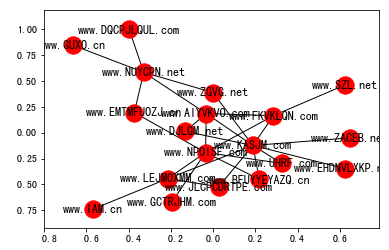

In [209]:
nx.draw_networkx(website_network)

In [214]:
sorted(nx.pagerank(website_network).items() , key = lambda x:x[1], reverse = True)

[('www.KASJM.com', 0.17657281868137434),
 ('www.NPOISF.com', 0.11473366244107264),
 ('www.NUYCPN.net', 0.10639927123132092),
 ('www.AIYVKVO.com', 0.09277618167663387),
 ('www.LEJMOXMM.com', 0.07041408926919115),
 ('www.FKVKLQN.com', 0.06752143157349891),
 ('www.EMTMFUOZJ.cn', 0.03690048546747282),
 ('www.ZGVG.net', 0.03661264079971778),
 ('www.JLCPCDRTPE.com', 0.03650189108666341),
 ('www.UHRF.com', 0.03547153911092067),
 ('www.BFUYYEYAZQ.cn', 0.03547153911092067),
 ('www.DJLGM.net', 0.034682431858164095),
 ('www.DQCPJLQUL.com', 0.0229681619991876),
 ('www.GUXO.cn', 0.0229681619991876),
 ('www.IAM.cn', 0.022857412286133222),
 ('www.SZL.net', 0.02224278981287875),
 ('www.GCTRJHM.com', 0.021827060310390483),
 ('www.EHDNVLXKP.net', 0.021539215642635445),
 ('www.ZACEB.net', 0.021539215642635445)]